# Logistic Regression

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv('alena.csv')
df 


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,337,4.770685,4,4.5,4.5,2.266958,1,0.92,1
1,324,4.672829,4,4.0,4.5,2.182675,1,0.76,1
2,316,4.644391,3,3.0,3.5,2.079442,1,0.72,0
3,322,4.700480,3,3.5,2.5,2.159869,1,0.80,1
4,314,4.634729,2,2.0,3.0,2.105353,0,0.65,1
...,...,...,...,...,...,...,...,...,...
391,324,4.700480,3,3.5,3.5,2.201659,1,0.82,1
392,325,4.672829,3,3.0,3.5,2.209373,1,0.84,1
393,330,4.753590,4,5.0,4.5,2.246015,1,0.91,1
394,312,4.634729,3,3.5,4.0,2.172476,0,0.67,1


# Data preparation

In [45]:
p=['GRE Score','TOEFL Score','University Rating','Research']

In [46]:
X = df[p]
y = df['level CGPA']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Feature Selection

In [48]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.609402
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.363  
Dependent Variable: level CGPA       AIC:              393.1418
Date:               2021-12-18 22:10 BIC:              408.1648
No. Observations:   316              Log-Likelihood:   -192.57 
Df Model:           3                LL-Null:          -141.30 
Df Residuals:       312              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
------------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
------------------------------------------------------------------
x1     0.3592      0.2510    1.4315    0.1523    -0.1326    0.8511
x2     0.4013      0.2395    1.6752    0.0939    -0.0682    0.8708
x3     0.185

Из все переменных только х2 является значимой, так как для сравнения нам нужна еще одна перемення, я возму х1 у которой результат лучше чем у х3 и х4

In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

4
[ True  True  True  True]
[1 1 1 1]


# Fitting Logistic Regression

In [56]:
X_train_select=X_train[:,[True, True,False, False]]
X_test_select=X_test[:,[True, True, False, False]]

In [57]:
X_train_select

array([[ 0.60007706, -0.0709423 ],
       [ 0.68714058,  0.73705438],
       [-0.00936759, -0.40476451],
       [ 0.25182297,  0.41827004],
       [ 1.12245819,  1.35789184],
       [ 0.33888649,  0.25669766],
       [-0.35762168, -1.09192087],
       [ 0.42595002,  0.41827004],
       [ 0.51301354,  0.8943181 ],
       [ 1.38364876,  0.8943181 ],
       [ 0.51301354,  0.8943181 ],
       [-1.92476507, -1.9901875 ],
       [-1.05412986, -0.23706607],
       [-2.0118286 , -2.55188713],
       [-0.35762168, -0.57406774],
       [ 0.33888649,  0.25669766],
       [ 1.03539467,  1.05019622],
       [ 0.51301354, -0.57406774],
       [-0.61881225, -0.23706607],
       [ 0.25182297,  0.41827004],
       [-0.00936759, -0.23706607],
       [-0.96706633, -0.74500677],
       [ 1.12245819,  1.05019622],
       [ 1.20952171,  0.73705438],
       [ 0.33888649,  0.25669766],
       [ 0.51301354,  0.09363612],
       [ 1.20952171,  1.95767987],
       [-1.75063803, -1.9901875 ],
       [-0.53174873,

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [59]:
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.862

Можно сделать вывод,что модель в 86% совершает правильный пропуск и в 14% совершает ошибку.

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  8]
 [ 3 62]]


Как видно, 69 примеров распознано верно, а 11 нет

# Visualising

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


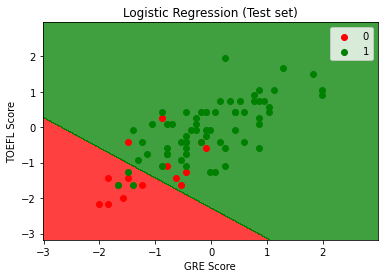

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.legend()
plt.show()

In [62]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('data1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()